<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [2]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [3]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,seed=seedno,p=0)
RGER = nx.gnm_random_graph(n,M,seedno)
RGG = nx.random_geometric_graph(n,R,seed=seedno)
# RGG =
SF = nx.barabasi_albert_graph(n,d,seedno)
SW = nx.watts_strogatz_graph(n,d,p,seed=seedno)

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [4]:
#football network
football=nx.read_gml(r"football.gml")

In [5]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

In [33]:
len(got.nodes)

119

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [6]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
# Remove self loops (inplace)
eu.remove_edges_from(nx.selfloop_edges(eu))
# Extract largest connected component
largest_cc = max(nx.connected_components(eu), key=len)
# Generate subgraph
eu_sub = eu.subgraph(largest_cc)

In [31]:
# Helpers

graph_dict = {REG:"Regular",RGER:"Erdos-Renyi",RGG:"Random Geometric Graph",
              SF:"Scale-Free",SW:"Small World",eu_sub:"eu-core",football:"American Football",got:"Game of Thrones"}

def find_degree(G):
    return [G.degree(n) for n in G.nodes()]

def plot_degree_distribution(G,name):
    degrees = find_degree(G)
    print("Mean degree for {} is {:.3f} with std {:.3f}".format(name,np.mean(degrees),np.std(degrees)))
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.title("Degree distribution for {}".format(name))
    plt.show()
    
def find_closeness(G):
    return list(nx.closeness_centrality(G).values())

def plot_centrality_distribution(G,name):
    centralities = find_closeness(G)
    print("Mean centrality for {} is {:.3f} with std {:.3f}".format(name, np.mean(centralities),np.std(centralities)))
    plt.hist(centralities)
    plt.xlabel("Centralities")
    plt.title("Centrality distribution for {}".format(name))
    plt.show()
    
def find_clustering_coeff(G):
    return [nx.clustering(G, n) for n in G.nodes()]

def plot_clustering_coeff(G,name):
    clustering_coeffs = find_clustering_coeff(G)
    print("Mean clustering coefficient for {} is {:.3f} with std {:.3f}".format(name,np.mean(clustering_coeffs),np.std(clustering_coeffs)))
    plt.hist(clustering_coeffs)
    plt.xlabel("Clustering coefficient")
    plt.title("Clustering coefficient distribution for {}".format(name))
    plt.show()

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

Mean degree for Regular is 4.000 with std 0.000


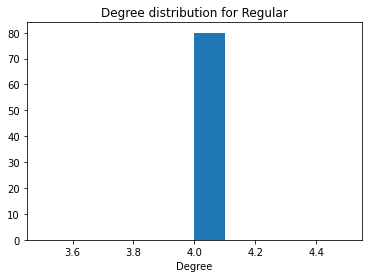

Mean degree for Erdos-Renyi is 7.500 with std 2.855


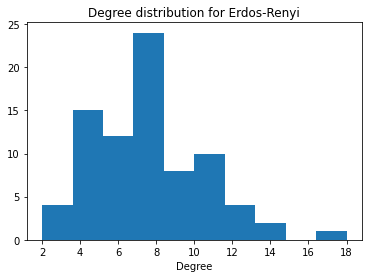

Mean degree for Random Geometric Graph is 11.250 with std 3.696


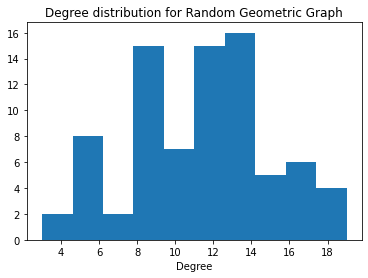

Mean degree for Scale-Free is 7.600 with std 5.262


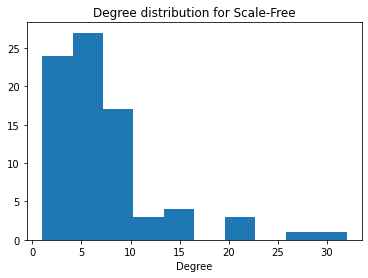

Mean degree for Small World is 4.000 with std 0.894


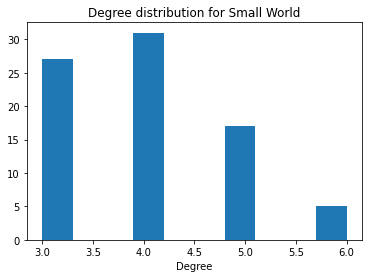

Mean degree for eu-core is 32.584 with std 37.026


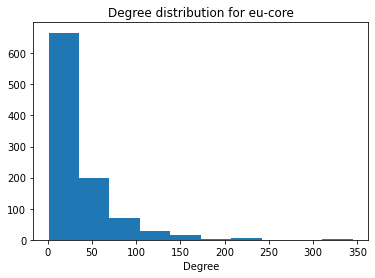

Mean degree for American Football is 10.661 with std 0.884


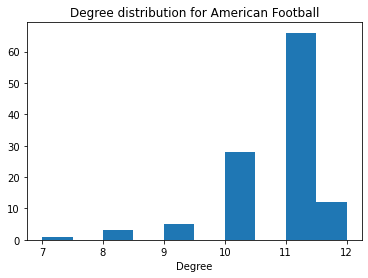

Mean degree for Game of Thrones is 6.655 with std 5.572


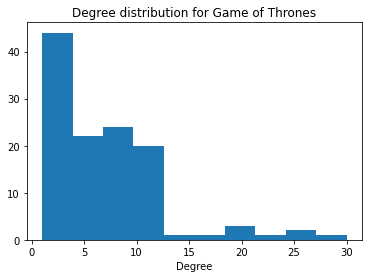

In [7]:
for graph,name in graph_dict.items():
    plot_degree_distribution(graph,name)

#### Σχολιασμός

Βάσει της κατανομής των βαθμών των πραγματικών δικτύων μπορούμε να δούμε εύκολα τα παρακάτω.

- Εu-core : Scale-Free (μιας και φαίνεται να ακολουθεί μια Power-law κατανομή)
- American Football: Small-World (καθώς ο μέσος βαθμός του degree είναι αρκετά υψηλός και το std μικρό)
- Game of Thrones: Scale-Free (Power-Law)

Φυσικά η πληροφορία που λαμβάνουμε από τα συγκεκριμένα γραφήματα δεν είναι επαρκής καθώς τα δίκτυα δεν 
ορίζονται μονοσήμαντα από την κατανομή των βαθμών τους. Πέραν τούτου μιας και έχει χρησιμοποιηθεί παντού ο ίδιος αριθμός
απο bins ενδέχεται να είναι κάπως παραπλανητικά κάποια γραφήματα.

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

Mean clustering coefficient for Regular is 0.500 with std 0.000


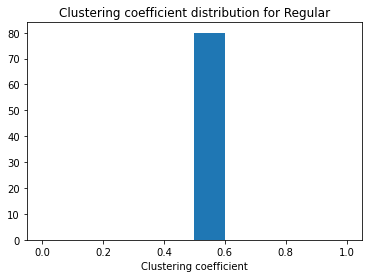

Mean clustering coefficient for Erdos-Renyi is 0.085 with std 0.065


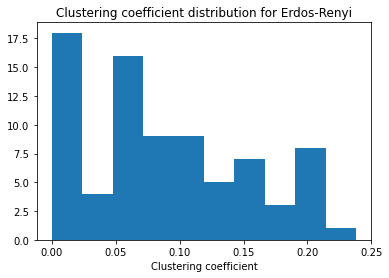

Mean clustering coefficient for Random Geometric Graph is 0.683 with std 0.144


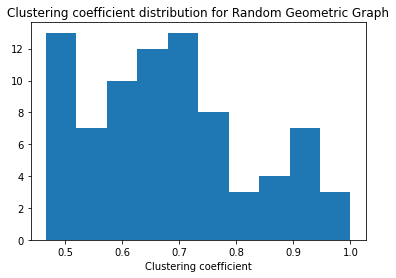

Mean clustering coefficient for Scale-Free is 0.229 with std 0.170


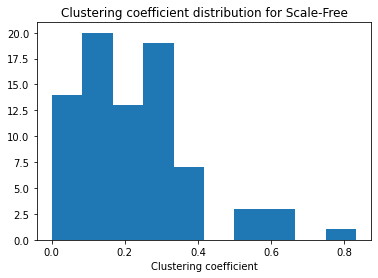

Mean clustering coefficient for Small World is 0.167 with std 0.168


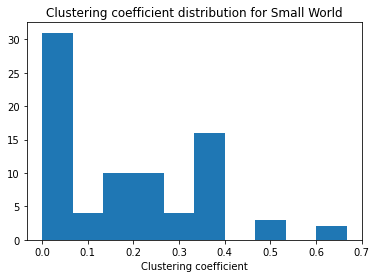

Mean clustering coefficient for eu-core is 0.407 with std 0.248


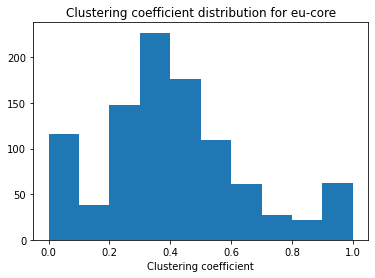

Mean clustering coefficient for American Football is 0.403 with std 0.104


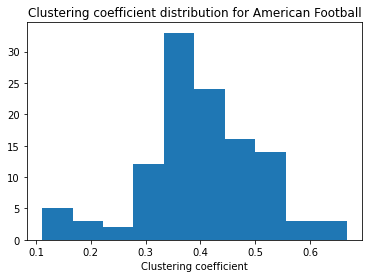

Mean clustering coefficient for Game of Thrones is 0.574 with std 0.355


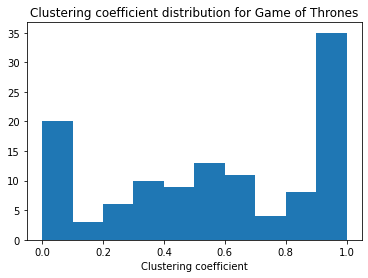

In [32]:
for graph,name in graph_dict.items():
    plot_clustering_coeff(graph,name)

#### Σχολιασμός

Μέσω του clustering coefficient μπορούμε να αντιληφθούμε καλύτερα τα συσσωματώματα κόμβων
που εμφανίζονται στο δίκτυο.

Γενικότερα σε ένα scale-free δίκτυο αναμένουμε όσο μεγαλώνει ο βαθμός του κόμβου να μικραίνει το clustering coefficient γεγονός
που υποδεικνύει ότι υπάρχουν πολλαπλά πυκνά υποδίκτυα κόμβων με μικρό βαθμό και κάποιοι κόμβοι (hubs) που συνδέονται με πολλαπλά τέτοια υποδίκτυα.

Στα small-world δίκτυα τείνουν να υπάρχουν cliques, near cliques γεγονός που οδηγεί σε μεγάλες τιμές clustering coefficient κατά μέσο όρο.

Από τα προαναφερθέντα μπορούμε να δούμε ότι υπάρχει συμφωνία με τα αποτελέσματα που είχαμε εξάγει μέσω της κατανομής του βαθμού των κόμβων μιας:

- Eu-core (υψηλή μέση τιμή cc με μεγάλη διακύμανση (Scale-Free))
- American Football (υψηλή μέση τιμή cc με μικρή διακύμανση (Small-world))
- Got (υψηλή μέση τιμή cc με μεγάλη διακύμανση (Scale-Free))

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

Mean centrality for Regular is 0.096 with std 0.000


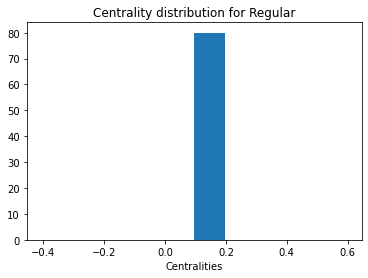

Mean centrality for Erdos-Renyi is 0.424 with std 0.037


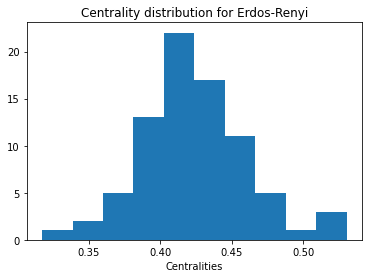

Mean centrality for Random Geometric Graph is 0.320 with std 0.049


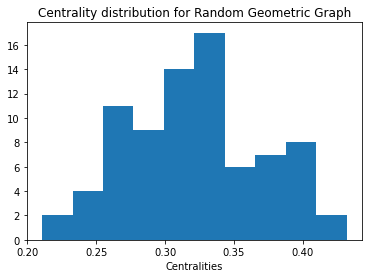

Mean centrality for Scale-Free is 0.443 with std 0.049


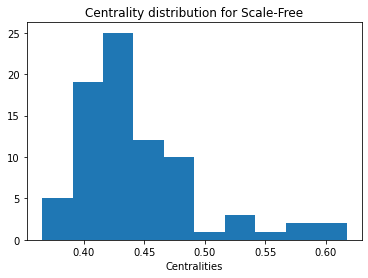

Mean centrality for Small World is 0.269 with std 0.018


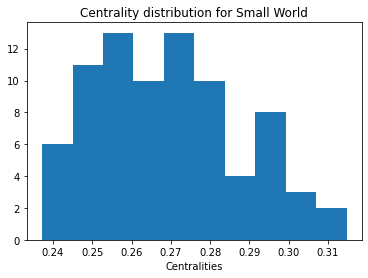

Mean centrality for eu-core is 0.394 with std 0.055


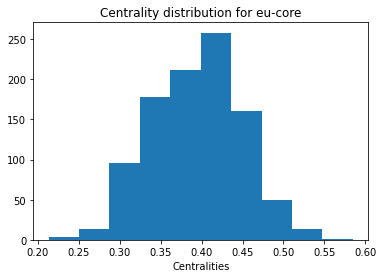

Mean centrality for American Football is 0.399 with std 0.016


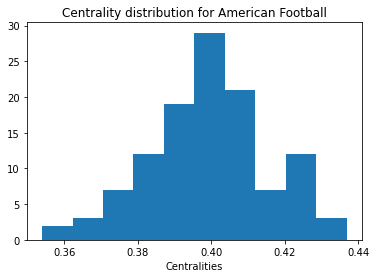

Mean centrality for Game of Thrones is 0.319 with std 0.052


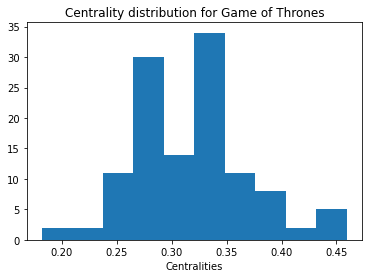

In [9]:
for graph,name in graph_dict.items():
    plot_centrality_distribution(graph,name)

#### Σχολιασμός

Μέσω του closeness μπορούμε να ποσοτικοποιήσουμε το πόσο κοντά βρίσκεται ένας κόμβος από όλους τους υπόλοιπους (με την άποψη γεωδεσικών μονοπατιών).

Όπως αναφέρεται και εδώ https://www.sciencedirect.com/science/article/abs/pii/S1007570406002383 το average path length ενός scale-free δικτύου πρέπει
να προσεγγίζει το $\frac{\log(n)}{\log(\log(n))}$, ενώ για τα small-world $L\propto \log N$.

Εάν τώρα χρησιμοποιήσουμε την nx.average_shortest_path_length μπορούμε να δούμε αν το avg shortest path length προσεγγίζεται
καλύτερα απο το $\log(n)$ ή από το $\frac{\log(n)}{\log(\log(n))}$

nx.average_shortest_path_length(eu_sub) = 2.58, 986 nodes
nx.average_shortest_path_length(football) = 2.50, 115 nodes
nx.average_shortest_path_length(got) = 3.21, 119 nodes

- Eu-core

$\log(986)=9.945, \frac{\log(986)}{\log(\log(986))}=3.001$

- American football

$\log(115)=6.84, \frac{\log(115)}{\log(\log(115))}=2.46$

- Game of thrones

$\log(119)=6.89, \frac{\log(119)}{\log(\log(119))}=2.475$

Αν πάρουμε την αντίστροφη της κάθε προσεγγίσης αναμένουμε να δούμε κάτι κοντά στον εμπειρικό μέσο του centrality

$ \frac{1}{9.945}=0.1, \frac{1}{3.001}=0.33 \lt 0.394$

$ \frac{1}{6.84}=0.146,  \frac{1}{2.46}=0.4 \approx 0.399$

$ \frac{1}{6.89}=0.145,  \frac{1}{2.475}=0.404 \gt 0.319$


Όπως είναι αναμενόμενο αυτές οι θεωρητικές προσεγγίσεις δεν είναι τέλειως σύμφωνες με τα εμπειρικά αποτελέσματα. Παρόλα αυτά
είναι εμφανές ότι υπάρχει μεγαλύτερη συμμφωνία προς την θεώρηση πως και τα τρία δίκτυα είναι scale-free.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [8]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [9]:
import itertools
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors_gen = itertools.cycle(colors)

In [10]:
football_intlabel,football_label_mapping = conv2int(football,0)
got_intlabel, got_label_mapping = conv2int(got,0)
eu_intlabel, eu_label_mapping = conv2int(eu_sub,0)

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [11]:
import itertools
import pandas as pd
graph_dict = {REG:"Regular",RGER:"Erdos-Renyi",RGG:"Random Geometric Graph",
              SF:"Scale-Free",SW:"Small World",eu_intlabel:"eu-core",football_intlabel:"American Football",got_intlabel:"Game of Thrones"}


def generate_communities_newman_girvan(k,G):
    communities= []
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    
    yield itertools.takewhile(lambda c: len(c) <= k, comp)
        



In [12]:
index = [(i,name) for name in graph_dict.values() for i in range(2,51)]

m_index = pd.MultiIndex.from_tuples(index, names=["Community_len", "Network"])
ng_metrics = pd.DataFrame(index= m_index,columns=['Communities','Modularity','Performance'])


# Solution with pandas (practical)
for graph,name in graph_dict.items():
    for community in next(generate_communities_newman_girvan(50,graph)):
        ng_metrics.loc[len(community),name] = [community,
                                              nx.algorithms.community.quality.modularity(graph,community),
                                              nx.algorithms.community.quality.performance(graph,community)]

# Solution with dicts (faster)
# graph_communities_modularity = {}
# graph_communities_performmance = {}
# for graph,name in graph_dict.items():
#     for community in next(generate_communities_newman_girvan(50,graph)):
#         graph_communities_modularity[(name,len(community))] = (community,nx.algorithms.community.quality.modularity(graph,community))
#         graph_communities_performmance[(name,len(community))] = (community,nx.algorithms.community.quality.performance(graph,community))

In [152]:
ng_metrics

,,Communities,Modularity,Performance
Community_len,Network,,,
2,Regular,"({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",0.4625,0.553165
3,Regular,"({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",0.56875,0.677848
4,Regular,"({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",0.675,0.802532
5,Regular,"({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",0.6875,0.832278
6,Regular,"({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",0.7,0.862025
...,...,...,...,...
46,Game of Thrones,"({0, 65, 1, 44, 53, 59, 30}, {2, 3, 34, 7, 42,...",0.515974,0.963111
47,Game of Thrones,"({0, 65, 1, 44, 53, 59, 30}, {2, 3, 34, 7, 42,...",0.506409,0.963253
48,Game of Thrones,"({0, 65, 1, 44, 53, 59, 30}, {2, 3, 34, 7, 42,...",0.498017,0.963823


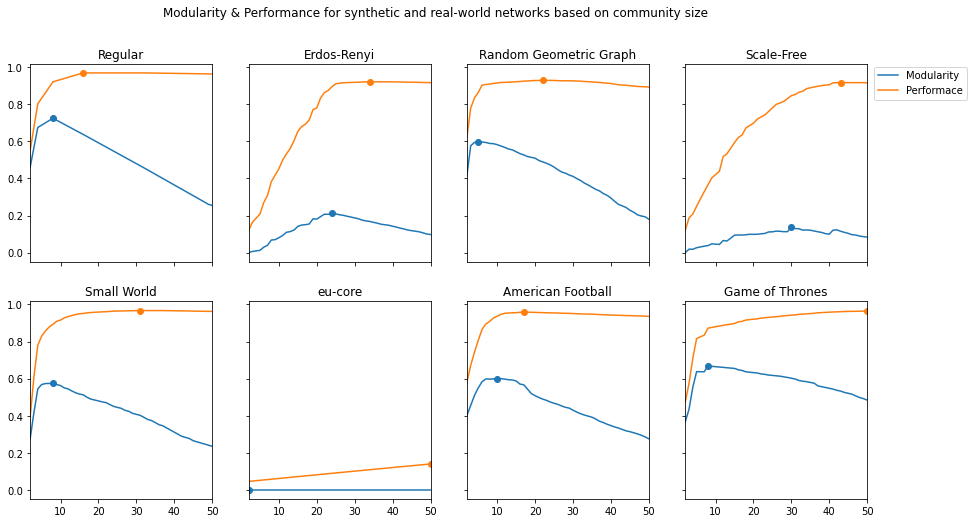

In [141]:
fig, axs = plt.subplots(2,len(graph_dict) // 2,sharex=True,sharey=True, figsize=(15,8))
plt.suptitle("Modularity & Performance for synthetic and real-world networks based on community size")
plt.xlim(2,50)

graph_names = list(graph_dict.values())

for i, ax in enumerate(axs.flat):
    gname = graph_names[i]
    modularity_series = ng_metrics.xs(gname, level=1, drop_level=False)['Modularity']
    performance_series = ng_metrics.xs(gname, level=1, drop_level=False)['Performance']
    ax.set_title(gname)
    ax.plot(range(2,51), modularity_series, label='Modularity')
    ax.plot(range(2,51), performance_series, label='Performace')
    ax.scatter(np.argmax(modularity_series)+2,np.max(modularity_series))
    ax.scatter(np.argmax(performance_series)+2,np.max(performance_series))

plt.legend(loc=(1.04,2.02))

#### Σχολιασμός

Τα δυο παραπάνω κελιά αφορούν την εκτέλεση του αλγορίθμου Newman-Girvan καθώς και την οπτικοποίηση της απόδοσης
των παραχθέντων κοινοτήτων σε modularity και performance.

Συγκεκριμένα, αυτός ο αλγόριθμός στηρίζεται στο Edge Betweness Centrality(EBC) και επαναληπτικά αφαιρεί την 
ακμή με την μεγαλύτερη EBC καθώς έχει μεγάλη πιθανότητα να αποτελεί γέφυρα για δύο κοινότητες.

Επομένως μέσω της χρήσης της itertools.takewhile μπορούμε να παράξουμε 50 κοινότητες για ανάλυση.

Όντας επαναληπτικός αλγόριθμός που έχει έναν κοστοβόρο υπολογισμό πρόρκειται για έναν αλγόριθμο που έχει
υψηλές χρονικές απαιτήσεις. (50 communities $\forall$ δίκτυο σε 7 λεπτά)

Κανονικά ο αλγόριθμος αυτός εκτελείται μέχρι κάθε κόμβος να αποτελεί μια κοινότητα αλλά εδώ έχουμε θέσει τον περιορισμό του επιθυμητού αριθμού κοινοτήτων.

Για τους πραγματικούς γράφους (eu-core, american football και Game of Thrones) έχουμε:
<!-- 
(εσωτερικές ακμες + αριθμός ακμών που δεν υπαρχουν μεταξύ κοινοτήτων) / πιθανές
-->
The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.

Modularity is seen below:


$Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \gamma\frac{k_ik_j}{2m}\right)
    \delta(c_i,c_j), $

Στον eu-core οι κοινότητες που φτιάχνονται είναι πολύ μεγάλες ως επι το πλείστον (**giant-components**) με αποτέλεσμα το *modularity* (που συγκρίνει τον αριθμό των ακμών μέσα σε ενα cluster σε σχέση με τον αναμενόμενο) να είναι **μικρό**. Αναφορικά με το **performance έχει γνησίως αύξουσα** τάση καθώς όσο αυξάνουμε τα communities δεν παύει η υπαρξη του giant component (που μας δίνει **πολλές intra-community edges και μη υπαρχόντων inter-community edges**) μεγενθύνοντας τον αριθμητή του performance.

Στο network american football που ειναι αισθητά μιρκότερος βλέπουμε ότι το γράφημα του modularity είναι αρκετά παρόμοιο με αυτό του small-world ενώ ταυτόχρονα 
παρατηρούμε ότι το modularity αυξάνεται αρχικά μέχρι να πιάσει το peak του περίπου στα 12 communities και ύστερ μειώνεται σχεδόν μονοτονικά. Αυτό συμβαίνει γιατί
στο εν λόγω δίκτυο **μεγαλύτερος αριθμός απο clusters μειώνει τα μέλη του κάθε cluster** με αποτέλεσμα να σχηματίζονται μερικές μεγάλες κοινότητες και πολλές που αποτελούνται απο μονοσύνολα.
Για το performance βλέπουμε πως αρχικά παρουσιάζει μια γνησίως αύξουσα πορεία ενώ μετά γίνεται ενα plateau. Αυτό σημαίνει πως η υπαρξη περισσότερων κοινοτήτων **μειώνει τις intra-community edges περίπου με τον ίδιο ρυθμό που αυξάνει τις μη υπάρχουσες inter-community edges**.

Αντίστοιχο φαινόμενο παρατηρούμε και στον γράφο του Game of thrones, ενώ διαφέρει η συμπεριφορά του performance που μας υποδεικνύει πως αυξάνεται πολύ περισσότερο ο αριθμός των μη-υπάρχουσων ακμών μεταξύ διαφορετικών κοινοτήτων που αυξάνει το performance.


Για τα συνθετικά δίκτυα έχουμε:

- Στα RGG υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου
- Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.
- Στην περίπτωση των small-world δικτύων, είναι πιθανό να σχηματίζονται λιγότερες κοινότητες μεγαλύτερου μεγέθους γύρω απο τους κόμβους με μεγάλο clustering coefficient.
- Στην περίπτωση των Erdos-Renyi δημιουργούνται κοινότητες πιθανώς γύρω απο τους κόμβους με μεγάλο βαθμό (μιας και τα edges είναι τυχαία).




<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [13]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [14]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
index = [(i,name) for name in graph_dict.values() for i in range(2,51)]

m_index = pd.MultiIndex.from_tuples(index, names=["Community_len", "Network"])
sc_metrics = pd.DataFrame(index= m_index,columns=['Labels','Communities','Modularity','Performance'])

for graph,name in graph_dict.items():
    adj_mat = nx.to_numpy_matrix(graph)
    
    for i in range(2,51):
        clustering = SpectralClustering(n_clusters=i,assign_labels='discretize',affinity='precomputed', random_state=0,n_jobs=-1).fit(adj_mat)
        communities = tuple(set(np.argwhere(clustering.labels_==k).flatten()) for k in range(i))
        sc_metrics.loc[i,name][['Labels','Communities']] = [clustering.labels_,communities]
        sc_metrics.loc[i,name][['Modularity','Performance']]= [
                                                            nx.algorithms.community.quality.modularity(graph,sc_metrics.loc[i,name]['Communities']),
                                                                nx.algorithms.community.quality.performance(graph,sc_metrics.loc[i,name]['Communities'])]

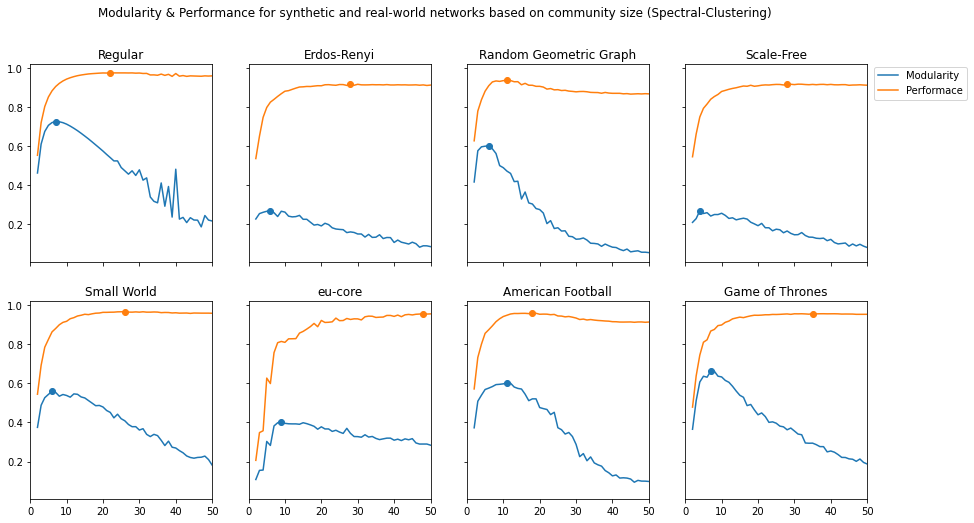

In [145]:
fig, axs = plt.subplots(2,len(graph_dict) // 2,sharex=True,sharey=True, figsize=(15,8))
plt.suptitle("Modularity & Performance for synthetic and real-world networks based on community size (Spectral-Clustering)")
plt.xlim(0,50)

graph_names = list(graph_dict.values())

for i, ax in enumerate(axs.flat):
    gname = graph_names[i]
    modularity_series = sc_metrics.xs(gname, level=1, drop_level=False)['Modularity']
    performance_series = sc_metrics.xs(gname, level=1, drop_level=False)['Performance']
    ax.set_title(gname)
    ax.plot(range(2,51), modularity_series, label='Modularity')
    ax.plot(range(2,51), performance_series, label='Performace')
    ax.scatter(np.argmax(modularity_series)+2,np.max(modularity_series))
    ax.scatter(np.argmax(performance_series)+2,np.max(performance_series))

plt.legend(loc=(1.04,2.02))

In [156]:
sc_metrics.loc[10,'eu-core']['Communities']

(set(),
 {158,
  159,
  209,
  210,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  319,
  598,
  621,
  630,
  635,
  637,
  663,
  860,
  907,
  908,
  911,
  912,
  944,
  958},
 {414, 415, 449, 479, 602, 604, 643, 687, 780, 827, 833, 897},
 {7,
  8,
  9,
  11,
  12,
  19,
  43,
  44,
  141,
  161,
  213,
  246,
  247,
  264,
  265,
  266,
  267,
  293,
  324,
  332,
  358,
  359,
  360,
  362,
  374,
  406,
  407,
  421,
  430,
  441,
  451,
  452,
  466,
  487,
  488,
  496,
  498,
  499,
  500,
  501,
  502,
  503,
  504,
  505,
  506,
  510,
  525,
  529,
  530,
  555,
  558,
  565,
  566,
  569,
  570,
  573,
  601,
  607,
  646,
  655,
  660,
  665,
  667,
  689,
  690,
  696,
  708,
  717,
  725,
  738,
  749,
  786,
  787,
  804,
  808,
  811,
  814,
  837,
  874,
  893,
  894,
  903,
  932,
  937,
  938,
  948,
  952,
  953,
  954,
  956,
  977},
 {2,
  3,
  4,
  5,
  6,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  63,


#### Σχολιασμός 

Τα δύο παραπάνω κελιά ασχολούνται με την μέθοδο του spectral-clustering. Αυτή η μέθοδος στηρίζεται περισσότερο σε γραμμική άλγεβρα
και συγκεκριμένα στο λαπλασιανό πίνακα που χρησιμοποιεί για να εκμαιεύσει χρήσιμες πληροφορίες για τον εκάστοτε γράφο (πλήθος συνδεδεμένων συνιστωσών, πυκνότητα γράφου, minimum cut).

Ποιοτικά φαίνεται πώς οι διαμερίσεις που παράγονται απο το spectral clustering είναι καλύτερες καθώς **αποφεύγουν την δημιουργία των giant components** και των πολλαπλών κοινοτήτων με πολύ
λίγα στοιχεία. Αυτό γίνεται αισθητό τόσο μέσω της εξέτασης του μεγέθους της κάθε κοινότητας για διάφορους αριθμούς κοινοτήτων αλλά και με τα εμφανώς καλύτερα αποτελέσματα
στις ποσοτικές μετρικές του modularity και του performance.


Επομένως συμπεραίνουμε ότι ο αλγόριθμος είναι πιο robust και μπορεί να βρεί διάφορα μεγέθη κοινοτήτων ενώ χρόνικα είναι εμφανώς πιο γρήγορος από τον Newman-Girvan καθώς στηρίζεται
σε άλγεβρα πινάκων για την οποία υπάρχουν optimized λύσεις.


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [15]:
index = [(1,name) for name in graph_dict.values()]

m_index = pd.MultiIndex.from_tuples(index, names=["Minimum_Community_Length", "Network"])
md_greedy_metrics = pd.DataFrame(index= m_index,columns=['Communities','Community_Length','Modularity','Performance'])

for graph,name in graph_dict.items():
#     for i in range(1,51):   
    comms = nx.algorithms.community.greedy_modularity_communities(graph,n_communities=1)
    md_greedy_metrics.loc[1,name] = [comms, len(comms),
                                    nx.algorithms.community.modularity(graph,comms),
                                    nx.algorithms.community.performance(graph,comms)]


#### Σχολιασμός

Εδώ ο αλγόριθμος δρα greedily και ιεραρχικά εφόσον ξεκινάει από τον κάθε κόμβο ως μια κοινότητα και ελέγχει την επίδραση που θα έχει η ένταξη ενός
άλλου κόμβου στις διάφορες κοινότητες. Όπως κάθε greedy αλγόριθμος είναι πάρα πολύ γρήγορος αλλά μπορεί να παγιδευτεί σε τοπικά μέγιστα/ελάχιστα.

Συγκεκριμένα ο αλγόριθμος **τείνει να μην λειτουργεί τόσο καλά σε μεγάλους γράφους** καθώς υπάρχει το Resolution limit μέσω του οποίου βλέπουμε πως σε μεγάλα δίκτυα
κάποιες **weakly-connected συνιστώσες ομαδοποιούνται**, δηλαδή ο γράφος έχει "πρόβλημα" στην ανίχνευση μικρών κοινοτήτων. Έχοντας πει αυτό στα θετικά του αλγορίθμου βρισκέται
το γεγονός ότι οι κοινότητες που ανιχνεύονται δεν πάσχουν απο το giant-component πρόβλημα.

In [24]:
def generate_plot(graph_dict,df,title="Community detection",metric='Modularity',offset=2):
    fig, axs = plt.subplots(2,len(graph_dict) // 2,sharex=True,sharey=True, figsize=(15,8))
    plt.suptitle(title)

    graph_names = list(graph_dict.values())
    graphs = list(graph_dict.keys())

    for i, ax in enumerate(axs.flat):
        gname = graph_names[i]

        pos = nx.spring_layout(graphs[i])
        # find max metric position
        opt_metric = df.xs(gname, level=1, drop_level=False)[metric]
        max_mod_pos = np.argmax(opt_metric)
        ax.set_title(gname+"\n"+metric+" :"+str(round(np.max(opt_metric),3)))
        comms = df.loc[max_mod_pos+offset,gname]['Communities']
        for community in comms:
            # draw
            nx.draw_networkx_nodes(graphs[i],pos,list(community), node_color=next(colors_gen),ax=ax,node_size=50)
            nx.draw_networkx_edges(graphs[i], pos, alpha=0.3,ax=ax)

#### Σχολιασμός

Παρακάτω φαίνονται τα communities απο τους διαφορους αλγορίθμους βάσει των μετρικών modularity και performance.

Τα καλύτερα αποτελέσματα για το Modularity στους πραγματικούς γράφους τα παίρνουμε:

- Eu-core (modularity SC, performance SC)
- American Football (modularity SC, performance NG-SC)
- Game of Thrones (Modularity NG, performance NG)

Παρόλο που ο greedy δεν αναδείχθηκε νικητής για κάποια περίπτωση εξ'αυτών αξίζει να σημειωθεί ότι τα έχει πάει αρκετά
καλά σε όλες τις περιπτώσεις εν αντιθέσει με τον NG που για το eu-core έχει παρουσιάσει modularity 0.001.


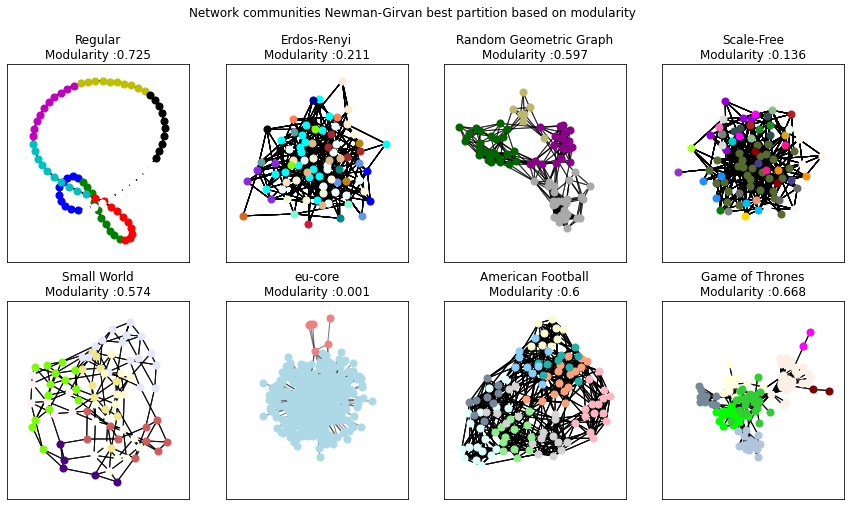

In [25]:
generate_plot(graph_dict,ng_metrics,'Network communities Newman-Girvan best partition based on modularity')

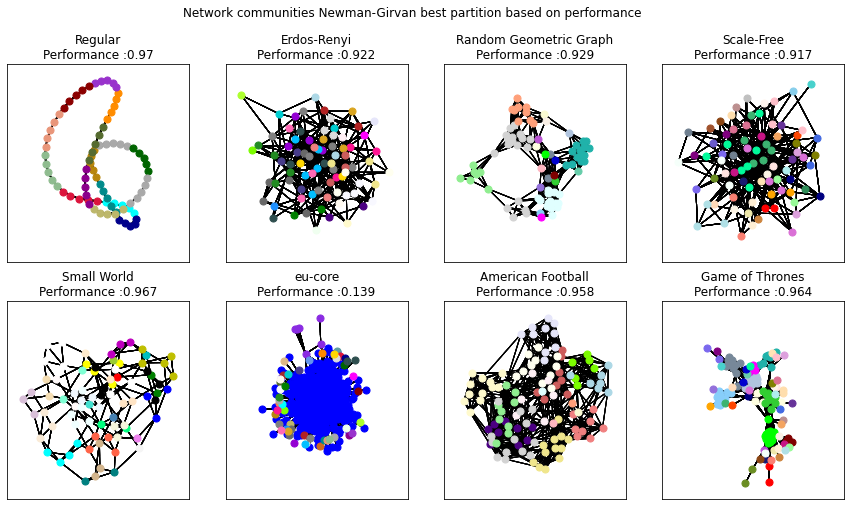

In [81]:
generate_plot(graph_dict,ng_metrics,'Network communities Newman-Girvan best partition based on performance',metric='Performance')

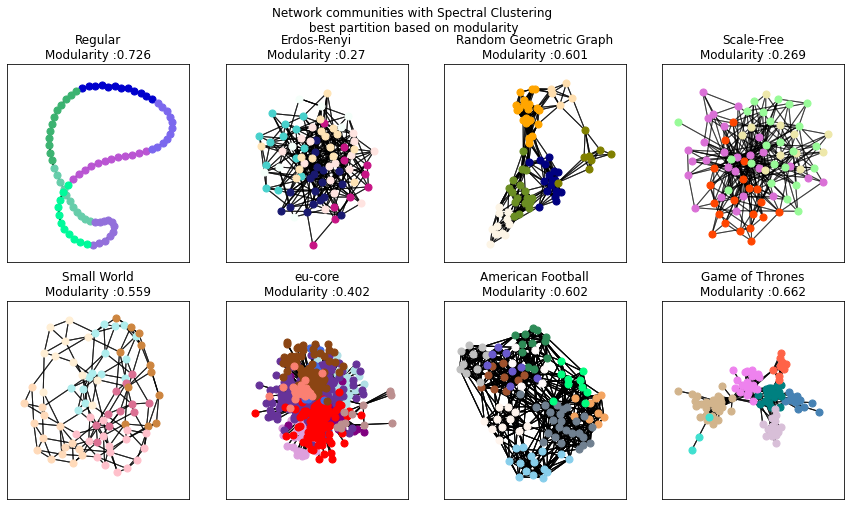

In [26]:
generate_plot(graph_dict,sc_metrics,'Network communities with Spectral Clustering\n best partition based on modularity\n')

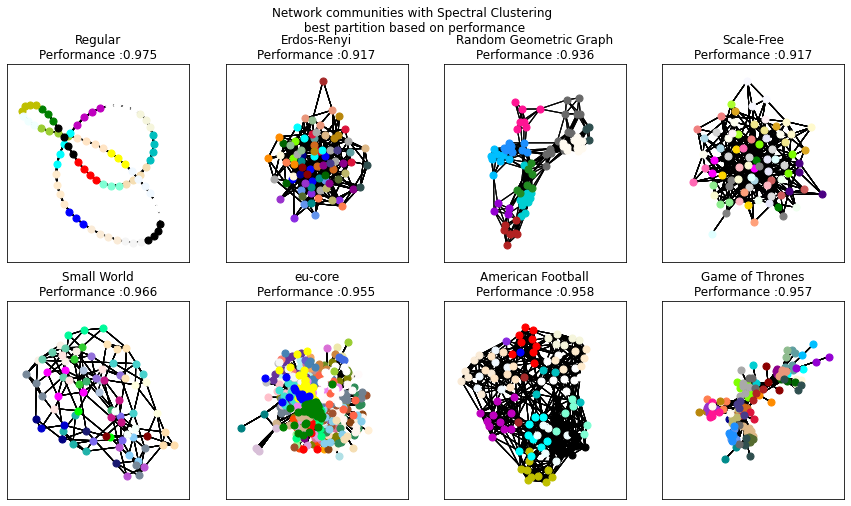

In [27]:
generate_plot(graph_dict,sc_metrics,'Network communities with Spectral Clustering\n best partition based on performance\n',metric='Performance')

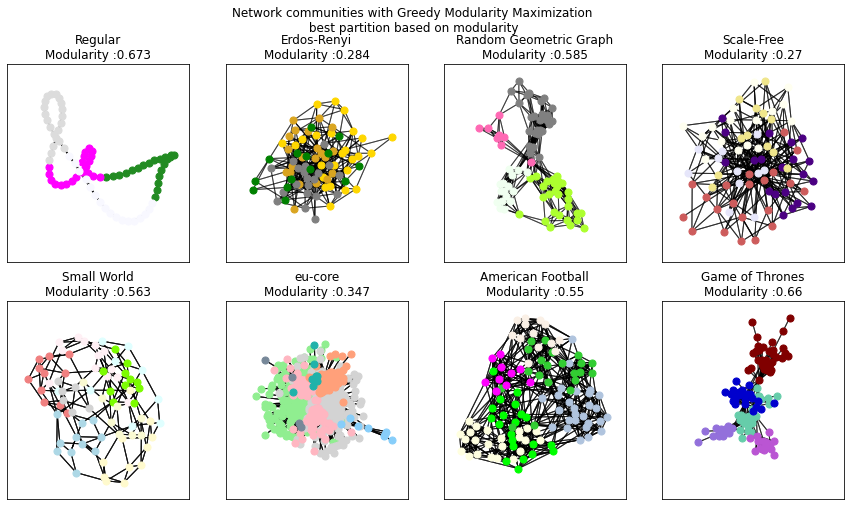

In [28]:
generate_plot(graph_dict,md_greedy_metrics,'Network communities with Greedy Modularity Maximization\n best partition based on modularity\n',offset=1)

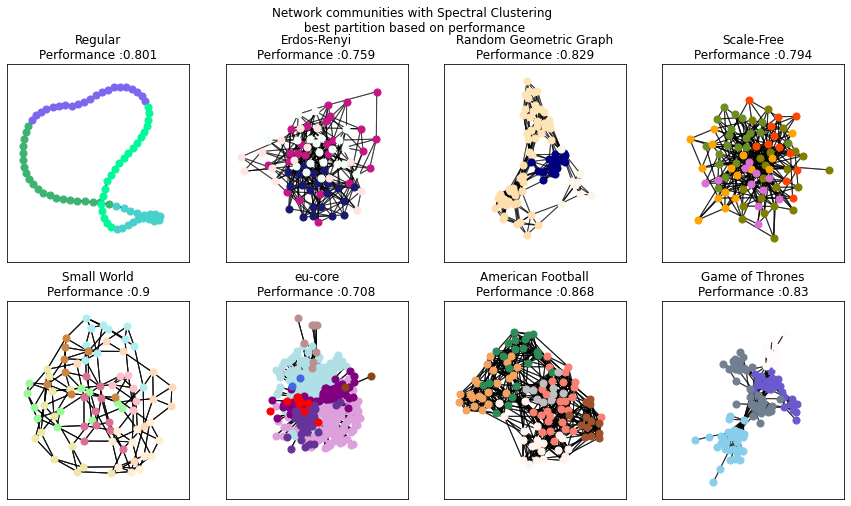

In [29]:
generate_plot(graph_dict,md_greedy_metrics,'Network communities with Spectral Clustering\n best partition based on performance\n',metric='Performance',offset=1)

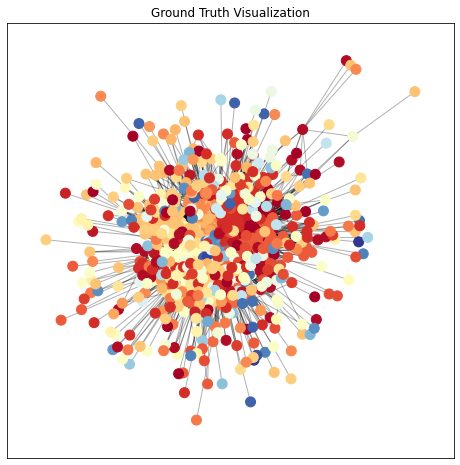

In [162]:
def plot_gtruth(G,partition):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 8))
    plt.title("Ground Truth Visualization")
    nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)
    
GTruth = dict()
with open("email-Eu-core-department-labels.txt") as f:
    for line in f:
        (key, val) = line.split()
        if int(key) in eu_intlabel.nodes:
            GTruth[int(key)] = int(val)
plot_gtruth(eu_intlabel,GTruth)

In [96]:
opt_metric = sc_metrics.xs('eu-core', level=1, drop_level=False)['Modularity']
max_mod_pos = np.argmax(opt_metric)
comms = sc_metrics.loc[max_mod_pos+2,'eu-core']['Communities']

In [144]:
def communities_to_labels(G,communities):
    predicted_labels = np.empty(shape=(len(G.nodes)))
    for i,community in enumerate(communities):
        for node in community:
            predicted_labels[node]=i
    return predicted_labels

def labels_to_communities(labels):
    labels = np.array(labels)
    n_communities = max(labels)
    communities = tuple(set(np.argwhere(labels==i).flatten()) for i in range(0,n_communities+1))
    return communities

In [126]:
# Mutual Information between ground truth and best partition based on modularity
metrics.normalized_mutual_info_score(np.array(list(GTruth.values())),communities_to_labels(eu_sub,comms))

0.2802651577251012

#### Σχολιασμός

Το normalized Mutual Information εκφράζει την συνοχή δυο διαμερίσεων (κανονικοποιημένη στο \[0-1]).

Έχοντας επιλέξει την διαμέριση με το καλύτερο modularity βλέπουμε ότι το MI ανέρχεται στο 0.28 που είναι σχετικά χαμηλό.
Αυτό μπορεί να συμβαινεί όπως θα δούμε παρακάτω καθώς οι πραγματικές κοινότητες δεν τείνουν να παράγουν μεγάλες τιμές modularity.


In [145]:
GTruth_comms = labels_to_communities(list(GTruth.values()))

In [148]:
# Modularity metric for ground truth
nx.algorithms.community.modularity(eu_intlabel,GTruth_comms)

0.1901020811704625

In [149]:
# Performance metric for ground truth
nx.algorithms.community.performance(eu_intlabel,GTruth_comms)

0.936225944955262

Βλέπουμε ότι το ground truth παράγει μεγάλες τιμές performance επομένως θα βρούμε την καλύτερη διαμέριση βάσει του performance
που προέρχεται απο το SC και θα βρόυμε το MI των δύο.

In [166]:
opt_metric = sc_metrics.xs('eu-core', level=1, drop_level=False)['Performance']
max_mod_pos = np.argmax(opt_metric)
comms = sc_metrics.loc[max_mod_pos+2,'eu-core']['Communities']

In [164]:
# Mutual Information between ground truth and best partition based on modularity
metrics.normalized_mutual_info_score(np.array(list(GTruth.values())),communities_to_labels(eu_sub,comms))

0.4540409137438322

Πράγματι είναι πολύ καλύτερο το αποτέλεσμα από αυτό των κοινοτήτων που μεγιστοποιούν το modularity. Ειδικά αν λάβουμε υποψην ότι τα δυο partitions
έχουν διαφορετίκό αριθμό απο communities (GT-41, Custom-48) τότε το 0.45 MI ακούγεται αρκετά καλό. Φυσικά αλλαγές στο random seed του SC μπορούν να βελτιώσουν πολύ τα αποτελέσματα.